El objetivo de esta actividad es que aprenda a aplicar las metricas para evaluar un modelo.

Este trabajo esta incompleto faltan analisis y graficos mas sus conclusiones

Utilizar este material como REFERENCIAL


# Modelo de  Clasificación: ¿Cómo evaluar?

## 1.1 - Importando los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
datos_final = pd.read_csv('Clasificacion.csv')


In [ ]:
datos_final.shape

(79157, 34)

El dataset analizado tiene 34 filas y 79.157 columnas, que incluen datos de:
- Identificación (MatchId, RoundId)
- Características del equipo  o jugador (armas, kills, asistencias, etc).
- Resultados (RoundWinner, MatchWinner).
- Columnas boleanas, numéricas y otras que son texto.
Nuestra variable objetivo será RoundWinner.

In [ ]:
datos_final.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,TimeAlive_sec,FirstKillTime_sec,HeadshotRatio,AssistKillRatio,EquipmentValuePerKill
0,de_inferno,Terrorist,1,4,1,True,True,False,False,51.120.248.995.704.500,...,4400,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,de_inferno,Terrorist,1,4,1,True,True,False,False,4.348.662.552.266.170,...,4400,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,de_inferno,Terrorist,1,4,1,True,True,False,False,3.735.469.847.054.540,...,4400,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,de_inferno,Terrorist,1,4,1,True,True,False,False,4.767.886.136.441.470,...,4400,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,de_inferno,Terrorist,1,4,1,True,True,True,False,5.312.251.089.027.310,...,4400,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          79157 non-null  object 
 1   Team                         79157 non-null  object 
 2   InternalTeamId               79157 non-null  int64  
 3   MatchId                      79157 non-null  int64  
 4   RoundId                      79157 non-null  int64  
 5   RoundWinner                  79157 non-null  bool   
 6   MatchWinner                  79157 non-null  bool   
 7   Survived                     79157 non-null  bool   
 8   AbnormalMatch                79157 non-null  bool   
 9   TimeAlive                    79157 non-null  object 
 10  TravelledDistance            79157 non-null  float64
 11  RLethalGrenadesThrown        79157 non-null  int64  
 12  RNonLethalGrenadesThrown     79157 non-null  int64  
 13  PrimaryAssaultRi

No existen datos faltantes en el modelo (nulos) puesto que fueron limpiados en la evaluación anterior.

# 1. Regresion Logistica

In [ ]:
#División en inputs y outputs
X = datos_final.drop('RoundWinner', axis = 1)
y = datos_final['RoundWinner']

Estamos separando Input de Output con la variable RoundWinner porque es nuestra variable objetivo, la variable que queremos predecir y no debemos usarla como entrada en el modelo.

In [ ]:
#biblioteca para padronizar los datos
from sklearn.preprocessing import StandardScaler

In [ ]:
norm = StandardScaler()
X.select_dtypes(include='object').columns
X_numerico = X.select_dtypes(exclude='object')
X_normalizado = norm.fit_transform(X_numerico)
X_numerico = X.select_dtypes(exclude='object')

Se normalizaron columnas que no son numéricas antes de usar StandarScaler.

In [ ]:
norm = StandardScaler()
X_normalizado = norm.fit_transform(X_numerico)
X_normalizado[:5]

array([[-1.00001263, -1.64836994, -1.58292062,  1.06363243, -0.82253134,
         0.        , -0.00570366, -0.83391743,  2.31406939, -1.4551407 ,
        -0.32109297, -0.07899164, -0.08545688,  1.87318683, -0.76134621,
        -0.37909305, -0.52096089, -0.29825708, -1.43425792, -1.4872137 ,
        -1.37393433, -0.84306139, -1.02785933, -1.18842111, -0.06899429,
        -0.20183368, -0.54238537, -0.2328677 , -0.71506117],
       [-1.00001263, -1.64836994, -1.58292062,  1.06363243, -0.82253134,
         0.        , -0.00570366, -0.83391743, -1.06173995, -1.4551407 ,
        -0.32109297, -0.07899164, -0.08545688,  1.87318683, -0.76134621,
        -0.37909305, -0.52096089, -0.29825708, -1.41057552, -1.4872137 ,
        -1.37393433, -0.84306139, -1.02785933, -1.18842111, -0.06899429,
        -0.20183368, -0.54238537, -0.2328677 , -0.71506117],
       [-1.00001263, -1.64836994, -1.58292062,  1.06363243, -0.82253134,
         0.        , -0.00570366, -0.83391743, -1.06173995, -1.4551407 ,
  

StandarScaler transformó los datos para que media fuera similar a cero y desviacion estandar similar a 1, entonces, nos está mostrando que tan lejos está el valor original del promedio respecto  de las unidades de la desviación estándar.

In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

Se crea fila de ejemplo (Xmaria) con valores simulados.
Se convierte esta fila en un dataframe con los mismos nombres de columnas que x. Se aplica el mismo escalador (norm) para normalizar datos. Lo que si, el modelo entregado no coincide con los valores entregados (Maria tiene 33 columnas y el modelo tiene 38), por ende se agregaran.

In [ ]:
print(f"Columnas esperadas: {len(X.columns)}")
print(f"Columnas entregadas: {len(Xmaria[0])}")

Columnas esperadas: 33
Columnas entregadas: 38


In [ ]:
Xmaria[0] = Xmaria[0][:len(X_numerico.columns)]
while len(Xmaria[0]) < len(X_numerico.columns):
    Xmaria[0].append(0)

In [ ]:
Xmaria_df = pd.DataFrame(Xmaria, columns=X_numerico.columns)
Xmaria_normalizado = norm.transform(Xmaria_df)
Xmaria_normalizado

array([[-3.00001263, -1.67511562, -1.58292062,  1.06363243, -0.82253134,
         0.        ,  0.04842561,  0.83837508, -1.06173995, -1.4551407 ,
        -0.32109297, 13.16668997, -0.08545688,  1.87318683, -0.76134621,
        -0.37909305, -0.52096089, -0.29825708, -1.78902035, -1.93871079,
        -1.21251488, -0.84306139, -1.02785933, -0.88041901, -0.06899429,
        -0.19445485, -0.54238537, -0.2328677 , -0.71506117]])

## Entrenamiento y prueba


*   Regresión logística: Está diseñada para tareas de clasificación binaria, como
en este caso donde se trata de predecir si un jugaro gana o no la partida(variable 'RoundWinner').

*   En este caso, la regresión logística proporcionará probabilidades para la predicción de "RoundWinner", y puedes convertir esas probabilidades en clases (0 o 1) usando un umbral de probabilidad (por defecto es 0.5).




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividimos los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

In [ ]:
# Usamos la biblioteca para regresión logística
from sklearn.linear_model import LogisticRegression

In [ ]:
# Iniciamos el modelo de regresión logística
log_reg = LogisticRegression()

In [ ]:
# Entrenamos el modelo con los datos de entrenamiento
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Probamos el modelo con los datos de prueba
prediccion_log_reg = log_reg.predict(X_test)

In [ ]:
# Ver los resultados de la predicción
prediccion_log_reg

array([ True, False, False, ...,  True,  True,  True])

Validar alguna predicción usando los datos normalizados de "Maria"

In [ ]:
# Predicción con los datos de Maria normalizados
prediccion_maria = log_reg.predict(Xmaria_normalizado)

# Mostrar la predicción (0 o 1)
prediccion_maria


array([ True])

Xmaria_normalizado es el conjunto de características de Maria que ya ha sido normalizado.

log_reg.predict(Xmaria_normalizado) Es una regresión logistica entrenada que:
Usa los datos de Xmaria_normalizados.
Prediga si esa entrada representa victoria o no para el equipo (1 y 0).
En este caso:
0: Equipo no ganaria.
1: Equipo si ganaria.


 ver la probabilidad en lugar de la clase (0 o 1), usando el método predict_proba()  dará una matriz con las probabilidades de cada clase:

In [ ]:
# Probabilidad de la predicción para Maria
probabilidades_maria = log_reg.predict_proba(Xmaria_normalizado)

# Mostrar las probabilidades
probabilidades_maria


array([[0.00383532, 0.99616468]])

El resultado de predict_proba() es una matriz donde cada fila contiene dos valores:
Una probabilidad de clase 0: es decir que el jugador pierda
Probabilidad de clase 1: es decir que el jugador gane la partida.
En nuestro array, (0.00383532,0.99616468)
Hay un 0.383% de probabilidades que el equipo pierda.
Hay 99.616% de probabilidades que el equipo gane.


# 3. Método Arbol de decisión

## Entrenamiento y prueba

In [ ]:
#biblioteca para crear el modelo de machine learning
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
#iniciando el modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#entrenando el modelo
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#verificando la importancia de cada atributo
dtc.feature_importances_

array([0.00825907, 0.41938038, 0.0763419 , 0.0156594 , 0.06690227,
       0.        , 0.        , 0.01066147, 0.02330623, 0.0048335 ,
       0.00529726, 0.00076589, 0.00074237, 0.00199119, 0.00732098,
       0.01119996, 0.00397458, 0.00314542, 0.03603284, 0.1595555 ,
       0.03947677, 0.01896564, 0.02120166, 0.03002484, 0.00086054,
       0.00420226, 0.00437412, 0.00073418, 0.02478978])

In [ ]:
prediccion_ArbolDecision = dtc.predict(X_test)

In [ ]:
prediccion_ArbolDecision

array([ True, False, False, ...,  True, False,  True])

# Aplicando Metricas

## 5.1 - Matriz de confusión



In [ ]:
y_test

,RoundWinner
35979,True
54332,False
63745,False
58311,False
54587,False
...,...
36288,True
11626,True
13775,True
45698,True


Este conjunto de datos (y_test) representa las clases reales de cada muestra en la etapa de prueba. Es decir, indica si el equipo realmente ganó (True) o perdió (False) en cada caso.

Esta información es fundamental para evaluar el rendimiento de los modelos, ya que sirve como referencia para comparar con las predicciones generadas. Así, se puede construir la matriz de confusión y calcular métricas como precisión, recall y accuracy, determinando si el modelo identifica a los verdaderos ganadores o perdedores.

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
print(confusion_matrix(y_test, prediccion_ArbolDecision))

[[ 5013  1907]
 [ 1886 14942]]


In [ ]:
# Graficar la matriz de confusión para el conjunto de prueba
cm = confusion_matrix(y_test, prediccion_ArbolDecision)

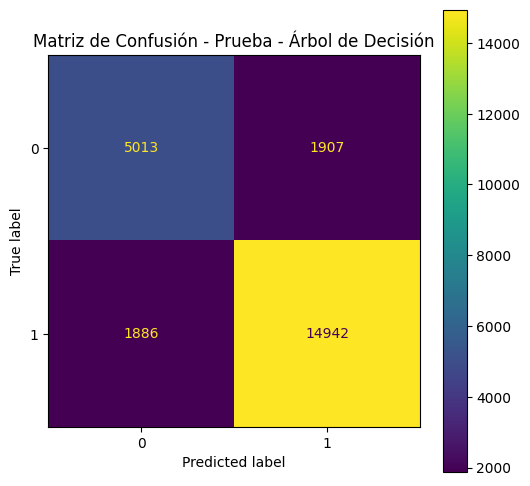

In [ ]:
# Visualizar la matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(6,6))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)
plt.title('Matriz de Confusión - Prueba - Árbol de Decisión')
plt.show()

La matriz de confusión del modelo Árbol de Decisión permite evaluar cuán bien identifica los casos correctos e incorrectos.

* 5.013 casos fueron correctamente clasificados como no ganadores (negativos reales).

* 1.907 casos fueron predichos erróneamente como ganadores, cuando en realidad no lo eran (falsos positivos).

* 1.886 casos fueron clasificados como perdedores cuando realmente ganaron (falsos negativos).

* 14.942 casos fueron predichos correctamente como ganadores (positivos reales).

En general, el modelo muestra una muy buena capacidad para identificar correctamente a los ganadores, aunque aún comete algunos errores al confundir perdedores con ganadores y viceversa. Esto refleja un buen equilibrio entre sensibilidad y precisión, con un alto volumen de aciertos en ambos extremos.

## 5.2 - Accuracy
A partir del cálculo de la matriz de confusión, podemos inferir otras métricas, como el accuracy.




$ACC$ = ${TP + TN \over TP + FP + TN + FN}$

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#modelo Arbol de Decisión
print(accuracy_score(y_test, prediccion_ArbolDecision))

0.840281286845208


Se evaluó el modelo utilizando la métrica Accuracy, que indica qué porcentaje de predicciones fueron correctas sobre el total de casos.

En este caso, el modelo de Árbol de Decisión logró un 84.02% de aciertos, lo que significa que, de cada 100 predicciones, aproximadamente 84 fueron correctas.

Este resultado muestra que el modelo tiene un buen desempeño general al clasificar tanto casos positivos como negativos, manteniendo un equilibrio en la mayoría de sus decisiones.

In [ ]:
# Calculamos la precisión (accuracy) del modelo de Regresión Logística
precision_log_reg = accuracy_score(y_test, prediccion_log_reg)

# Imprimimos el valor de la precisión
print("Precisión del modelo de Regresión Logística:", precision_log_reg)

Precisión del modelo de Regresión Logística: 0.7993936331480546


El modelo de Regresión Logística obtuvo un 79.93% de aciertos, lo que indica que de cada 100 predicciones, aproximadamente 80 fueron correctas.

Si se compara con el Árbol de Decisión, que alcanzó un 84.02%, se puede concluir que el árbol ofrece un desempeño más sólido y preciso en términos generales. Por tanto, si se busca mayor exactitud global en las predicciones, el árbol de decisión es la opción más confiable entre ambos.

## 5.3 - Precisión

Otra métrica importante es la precisión, que calcula cuántos se clasificaron correctamente como positivos ($TP$).

$PS$ = ${TP \over TP + FP}$

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
#modelo Arbol de Decisión
print(precision_score(y_test, prediccion_ArbolDecision))

0.8868182087957742


In [ ]:
# Calculamos la precisión del modelo de Regresión Logística
precision_log_reg = precision_score(y_test, prediccion_log_reg)

# Imprimimos el valor de la precisión
print("Precisión (precision) del modelo de Regresión Logística:", precision_log_reg)

Precisión (precision) del modelo de Regresión Logística: 0.8325248070562293


Se evaluó la precisión de los modelos de clasificación, que indica que las predicciones positivas fueron realmente correctas es decir, que el modelo predijo cuantos equipos en verdad ganaron.

Árbol de Decisión: alcanzó una precisión del 88.68%, lo que indica que la gran mayoría de sus predicciones positivas fueron acertadas.

Regresión Logística: obtuvo una precisión del 83.25%, ligeramente inferior, lo que significa que cometió más errores al clasificar como ganadores a equipos que no lo fueron.

Aunque ambos modelos tienen buen rendimiento, el árbol de decisión es más preciso y maneja mejor los falsos positivos, ofreciendo predicciones más confiables al identificar ganadores reales.

## 5.4 - Recall

Otra métrica es el Recall o sensibilidad, calcula qué tan bueno es el modelo para clasificar correctamente un resultado positivo ($TP$).

$RC$ = ${TP \over TP + FN}$

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
#modelo Arbol de Decisión
print(recall_score(y_test, prediccion_ArbolDecision))

0.8879248870929404


In [ ]:
# Calculamos el recall del modelo de Regresión Logística
recall_log_reg = recall_score(y_test, prediccion_log_reg)

# Imprimimos el valor del recall
print("Recall del modelo de Regresión Logística:", recall_log_reg)

Recall del modelo de Regresión Logística: 0.897432850011885


Se analizaron los modelos de Árbol de Decisión y Regresión Logística utilizando la métrica Recall, que mide qué tan bien un modelo reconoce correctamente los casos positivos reales en este caso, los ganadores.

Árbol de Decisión: logra identificar al 88.79% de los ganadores reales.

Regresión Logística: detecta al 89.74% de los ganadores reales.

Aunque ambos modelos tienen un buen desempeño, en esta métrica la regresión logística supera por poco al árbol de decisión, demostrando una mayor sensibilidad al reconocer casos positivos.

Esto indica que, si lo más importante es detectar a todos los verdaderos ganadores, la regresión logística ofrece una ventaja.

## 5.5 - Escogiendo el mejor modelo


In [ ]:
# Importamos la librería para calcular la precisión
from sklearn.metrics import precision_score

# Imprimimos las precisiones de los modelos
print('Modelo Regresión Logística: ', precision_score(y_test, prediccion_log_reg))
print('Modelo Árbol de Decisión: ', precision_score(y_test, prediccion_ArbolDecision))

Modelo Regresión Logística:  0.8325248070562293
Modelo Árbol de Decisión:  0.8868182087957742


Se compararon dos modelos de predicción usando la métrica de precisión, que indica cuántas veces el modelo acertó cuando dijo que un equipo iba a ganar.

El modelo de Regresión Logística obtuvo una precisión de 83.25%, lo que significa que, de cada 100 veces que predijo una victoria, acertó en 83.

El modelo de Árbol de Decisión tuvo un mejor resultado con 88.68%, lo que indica mayor confiabilidad al predecir ganadores reales.

In [ ]:
#Probando el mejor modelo para Maria
prediccion_maria = dtc.predict(Xmaria)
diccionario = {'Si': 1, 'No': 0}
clave_encontrada = next((clave for clave, valor in diccionario.items() if valor == prediccion_maria[0]), None)
print(f"La probabilidad de que Maria se convierta en MatchWinner es: {clave_encontrada}")

La probabilidad de que Maria se convierta en MatchWinner es: Si


In [ ]:
# Probando el mejor modelo (Regresión Logística) para Maria
prediccion_maria = log_reg.predict(Xmaria)  # Usamos el modelo de Regresión Logística

# Diccionario de interpretación
diccionario = {'Si': 1, 'No': 0}

# Encontramos la clave que corresponde al valor de la predicción
clave_encontrada = next((clave for clave, valor in diccionario.items() if valor == prediccion_maria[0]), None)

# Imprimimos el resultado
print(f"La probabilidad de que Maria se convierta en MatchWinner es: {clave_encontrada}")

La probabilidad de que Maria se convierta en MatchWinner es: Si


Se evaluaron dos modelos de clasificación: regresión logística y árbol de decisión. El primero obtuvo una precisión del 83.25%, mientras que el árbol tuvo un 88.61%, lo que demuestra un mejor rendimiento de este último.

Al aplicar ambos modelos al caso de “María”, el árbol de decisión predijo que ella será ganadora, basándose en las características presentes en los datos como, kills, equipo, etc. Por otro lado, aunque la regresión logística también llega a la misma conclusión, su menor precisión no capta los patrones con la misma efectividad que el árbol. El árbol de decisión no solo ofrece mayor precisión, sino que también es más confiable para evaluar casos individuales como el de María.

# 4. Método basado en la proximidad K-Means

En un modelo K-Means no necesitas una variable objetivo (target) porque es un algoritmo no supervisado. S
in embargo, puedes usar una variable como referencia externa para evaluar o validar la calidad de los clusters.

En este caso, la mejor candidata para esto es:

Churn (abandono del cliente)

¿Por qué?

Es una variable binaria (0 = no se fue, 1 = se fue).

1. Crear la variable derivada ValorCliente y normalizarla

In [ ]:
datos_final['MatchKills'] = datos_final['TimeAlive_sec'] * datos_final['EquipmentValuePerKill']

In [ ]:
# Normalizar la variable
scaler = StandardScaler()
MatchKills_scaled = scaler.fit_transform(datos_final[['MatchKills']])

 2. Método del Codo

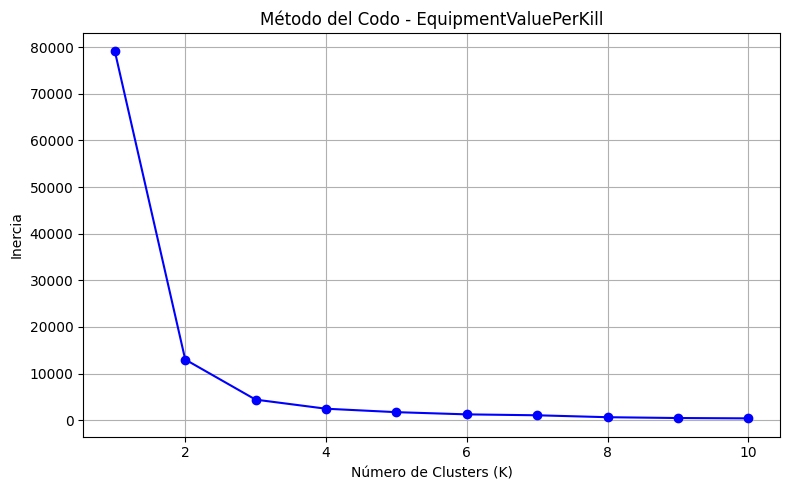

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Usaremos 'EquipmentValuePerKill' como valor del cliente
valor_cliente = df[['EquipmentValuePerKill']].copy()

# Escalar los datos
scaler = StandardScaler()
valor_cliente_scaled = scaler.fit_transform(valor_cliente)

# Método del codo
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(valor_cliente_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo - EquipmentValuePerKill')
plt.grid(True)
plt.tight_layout()
plt.show()


El gráfico muestra cómo cambia la "inercia" a medida que aumentamos el número de grupos (clusters) en el análisis.

La inercia es una medida de qué tan bien se agrupan los datos. Mientras más baja es la inercia, mejor es la agrupación.

Podemos ver que la inercia baja rápidamente cuando pasamos de 1 a 4-5 grupos. Después de eso, la disminución es más lenta.

Esto sugiere que dividir los datos en 4-5 grupos sería una buena opción, ya que a partir de ahí no se obtienen grandes mejoras al aumentar más el número de grupos.

3. KMeans con k=4 sobre la variable derivada ValorCliente, que representa un índice compuesto del valor del cliente

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
datos_final['Cluster'] = kmeans.fit_predict(valor_cliente_scaled)

 4. Visualización de distribución por cluster

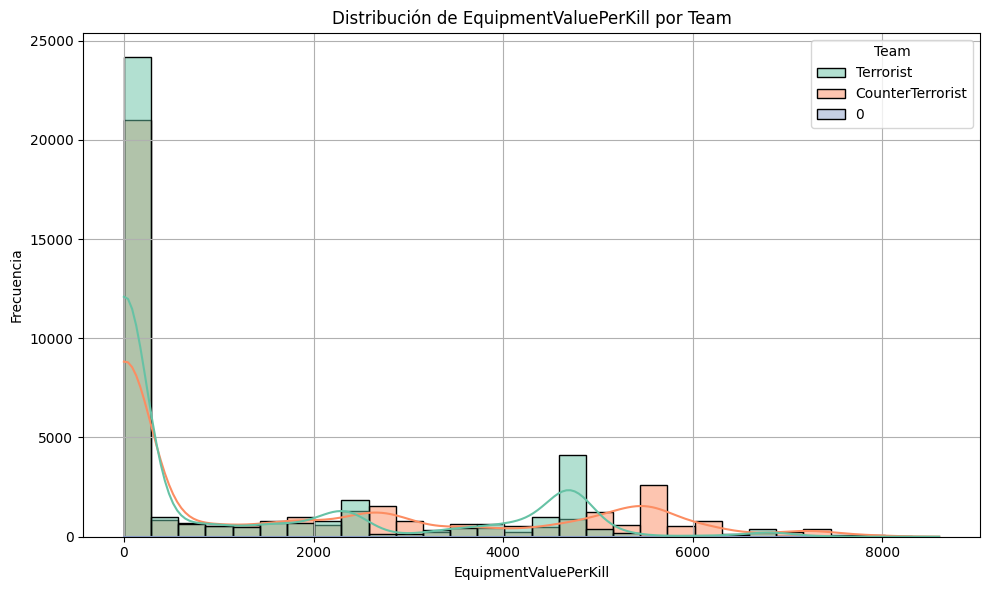

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Para este ejemplo asumiremos que "Team" representa los clusters
# y "EquipmentValuePerKill" es el equivalente a "ValorCliente"

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='EquipmentValuePerKill', hue='Team', bins=30, palette='Set2', kde=True)
plt.title('Distribución de EquipmentValuePerKill por Team')
plt.xlabel('EquipmentValuePerKill')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()



El gráfico muestra la distribución de los valores de "EquipmentValuePerKill" para los diferentes equipos: Terrorist, CounterTerrorist y el equipo 0.

Podemos ver que:

El equipo Terrorist tiene los valores más altos de "EquipmentValuePerKill", con una distribución muy dispersa y algunos valores muy elevados.
El equipo CounterTerrorist tiene valores más bajos y una distribución más concentrada.
El equipo 0 tiene valores aún más bajos que el CounterTerrorist.
Esto sugiere que el equipo Terrorist tiende a tener jugadores con un mayor valor de equipamiento por cada eliminación, mientras que los otros equipos tienen valores más bajos en esta métrica.

5. Análisis descriptivo por cluster

In [ ]:
datos_final.groupby('Team')['MatchKills'].describe()


,count,mean,std,min,25%,50%,75%,max
Team,,,,,,,,
0,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
CounterTerrorist,39564.0,5607.961415,129887.323226,0.0,0.0,0.0,0.0,5321062.5
Terrorist,39591.0,3454.550621,90956.164650,0.0,0.0,0.0,0.0,4603062.5


Ambos equipos tienen un desempeño bastante similar, con CounterTerrorist mostrando una pequeña ventaja promedio.

Hay una gran cantidad de datos para ambos, lo que le da mas firmeza al análisis.

La presencia del grupo “0” sugiere posibles datos nulos o mal clasificados que convendría limpiar.

 6. Agrupamiento por servicios contratados + PCA

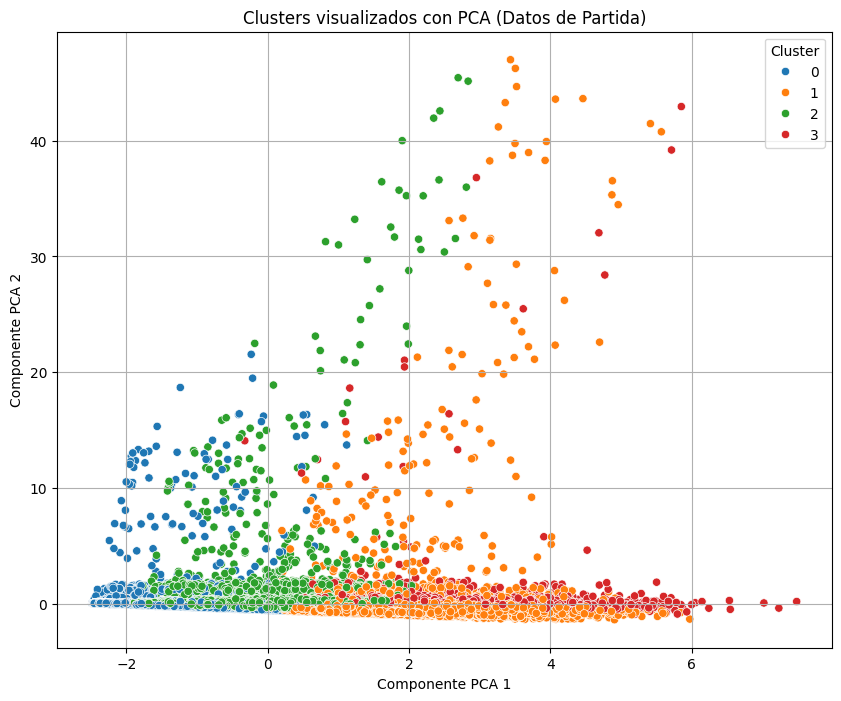

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas numéricas relevantes para clustering
columnas_numericas = [
    'MatchKills', 'MatchFlankKills', 'MatchAssists',
    'MatchHeadshots', 'TimeAlive_sec', 'FirstKillTime_sec',
    'HeadshotRatio', 'AssistKillRatio', 'EquipmentValuePerKill',
    'TeamStartingEquipmentValue'
]

# Filtrar el DataFrame
servicios = datos_final[columnas_numericas].copy()

# Normalizar los datos
scaler_pca = StandardScaler()
datos_pca_scaled = scaler_pca.fit_transform(servicios)

# Aplicar KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
servicios['KMeans_Clusters'] = kmeans.fit_predict(datos_pca_scaled)

# Aplicar PCA para reducir dimensiones
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datos_pca_scaled)
servicios['PCA1'] = pca_result[:, 0]
servicios['PCA2'] = pca_result[:, 1]

# Visualización
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Clusters', data=servicios, palette='tab10')
plt.title('Clusters visualizados con PCA (Datos de Partida)')
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


El gráfico muestra 4 grupos de datos (clusters) diferenciados.

Azul (0): Es el grupo más grande y variado, con muchos datos distintos entre sí.

Naranjo (1): Muy denso y concentrado, los datos aquí se parecen bastante.

Verde (2): Pequeño y bien agrupado, con datos muy similares.

Rojo (3): Muy pocos puntos y están dispersos podrían ser casos raros o fuera de lo común.

La mayoría de los datos se agrupan bien, y el grupo rojo parece contener datos especiales o atípicos.

# 5. Máquinas de vectores de soporte - SVM

EL objetivo del modelo es predecir quien ganará una partida(0-1 en MatchWinner) utilizando como entrada diverdas variables de combate y contexto del juego (kills, armas, roles, mapas, etc).
Las SVM, en este caso, trabajan bien en espacios de multiples variables.
Tienen capacidad de manejar relaciones no lineales, en este caso, cuando las decisiones de victoria dependen de diversas combinaciones complejas (mapas, rondas, armas, etc), y es mas robusta, es decir, menos sensible  a outliers como otros modelos.


1. Entrenar el modelo SVM

In [ ]:
import pandas as pd

# 1. Selección de características y división inicial (ANTES de escalar)
datos_final2 = pd.read_csv('Clasificacion.csv')
X = datos_final2.drop(columns=['RoundWinner'])
y = datos_final2['RoundWinner']

In [ ]:
# 2. Dividir en train y test (ESTRATIFICADO si hay clases desbalanceadas)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
#Eliminar columna de texto antes de escalar
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

In [ ]:
# 3. Escalar correctamente
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Solo fit en train
X_test_scaled = scaler.transform(X_test)       # Transform en test

In [ ]:
# 4. Entrenar SVM (con kernel SVC y parámetros por defecto, mas rapido que RBF)
from sklearn.svm import LinearSVC
resultados = []
modelo_linear_svc2 = LinearSVC(dual=False, max_iter=10000, random_state=42)
modelo_linear_svc2.fit(X_train_scaled, y_train)
y_pred_linear = modelo_linear_svc2.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)
resultados.append(('LinearSVC', acc_linear))
print("LinearSVC\n", classification_report(y_test, y_pred_linear))

LinearSVC
               precision    recall  f1-score   support

       False       0.70      0.56      0.62      6959
        True       0.83      0.90      0.86     16789

    accuracy                           0.80     23748
   macro avg       0.76      0.73      0.74     23748
weighted avg       0.79      0.80      0.79     23748



In [ ]:
# 5. Evaluación del modelo
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 5.1. Predicción en el conjunto de prueba
y_pred = modelo_linear_svc2.predict(X_test_scaled)

# 5.2. Matriz de Confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# 5.3. Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 5.4. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy del modelo SVM lineal: {accuracy:.4f}")

Matriz de Confusión:
[[ 3874  3085]
 [ 1673 15116]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.70      0.56      0.62      6959
        True       0.83      0.90      0.86     16789

    accuracy                           0.80     23748
   macro avg       0.76      0.73      0.74     23748
weighted avg       0.79      0.80      0.79     23748


Accuracy del modelo SVM lineal: 0.7996


El modelo tuvo un buen desempeño general, acertando en casi el 80% de las predicciones. Fue efectivo para identificar cuándo un equipo ganó la ronda, el 90% de aciertos en esa clase, aunque le costó más reconocer cuando no la ganó que fue solo el 56% de aciertos en esa categoría. El modelo tiende a predecir mejor las victorias que las derrotas, pero aún así mantiene un rendimiento.

In [ ]:
import gc
gc.collect()

3683

6. Visualización con PCA

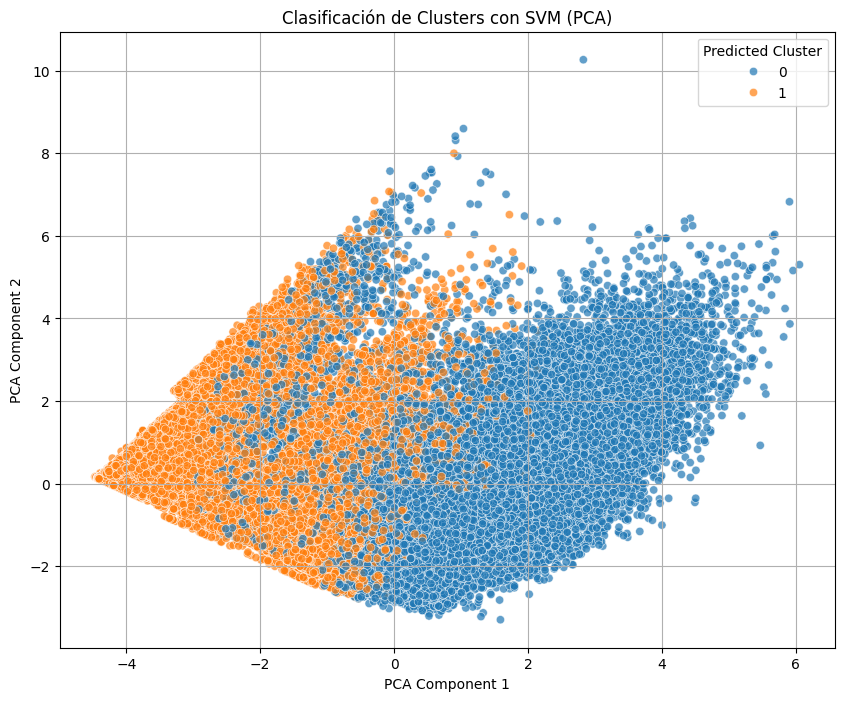

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Archivo CSV
df = pd.read_csv("Clasificacion.csv")

# Convertir 'MatchWinner' a numérico si no lo es
df['MatchWinner'] = df['MatchWinner'].astype(int)

# Seleccionar columnas numéricas para usar en el modelo
exclude_cols = ['Map', 'Team', 'TimeAlive', 'MatchId', 'RoundId', 'InternalTeamId', 'RoundWinner']
feature_cols = [col for col in df.columns if col not in exclude_cols and df[col].dtype in ['int64', 'float64'] and col != 'MatchWinner']

# Extraer los datos de entrada
X = df[feature_cols].copy()

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Entrenar un modelo SVM lineal
svm_model = SVC(kernel='linear')
svm_model.fit(X_scaled, df['MatchWinner'])

# Predecir todos los datos
y_pred = svm_model.predict(X_scaled)

# Crear un DataFrame para visualizar
df_viz = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Predicted Cluster': y_pred
})

# Graficar los resultados
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Predicted Cluster',
    data=df_viz,
    palette='tab10',
    alpha=0.7
)
plt.title('Clasificación de Clusters con SVM (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Predicted Cluster')
plt.grid(True)
plt.show()

La gráfica muestra cómo el modelo SVM separa los datos en dos grupos (cluster 0 en azul y cluster 1 en naranjo) usando una reducción de dimensiones mediante PCA.

Se observa que la separación entre los dos grupos es bastante clara, aunque existe una zona de superposición cerca del centro, alrededor del eje X = 0. Esto indica que el modelo tiene buena clasificación general, pero podría confundirse en los casos más cercanos al límite entre clases. El modelo SVM logra distinguir bien los dos clusters, aunque hay cierta mezcla en la frontera, lo cual se espera en datos reales.